In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("/content/salaries.csv")

In [5]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [7]:
inputs = df.drop('salary_more_then_100k',axis = 'columns')
target = df['salary_more_then_100k']

In [8]:
inputs


,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [11]:
inputs.columns

Index(['company', 'job', 'degree'], dtype='object')

In [12]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])


In [13]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [14]:
inputs_n = inputs.drop(['company', 'job', 'degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
from sklearn import tree

In [16]:
model = tree.DecisionTreeClassifier()

In [17]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [18]:
model.score(inputs_n,target)

1.0

In [20]:
model.predict([[2,2,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
model.predict([[2,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# **Draw a Decision Tree**

In [24]:
import matplotlib.pyplot as plt

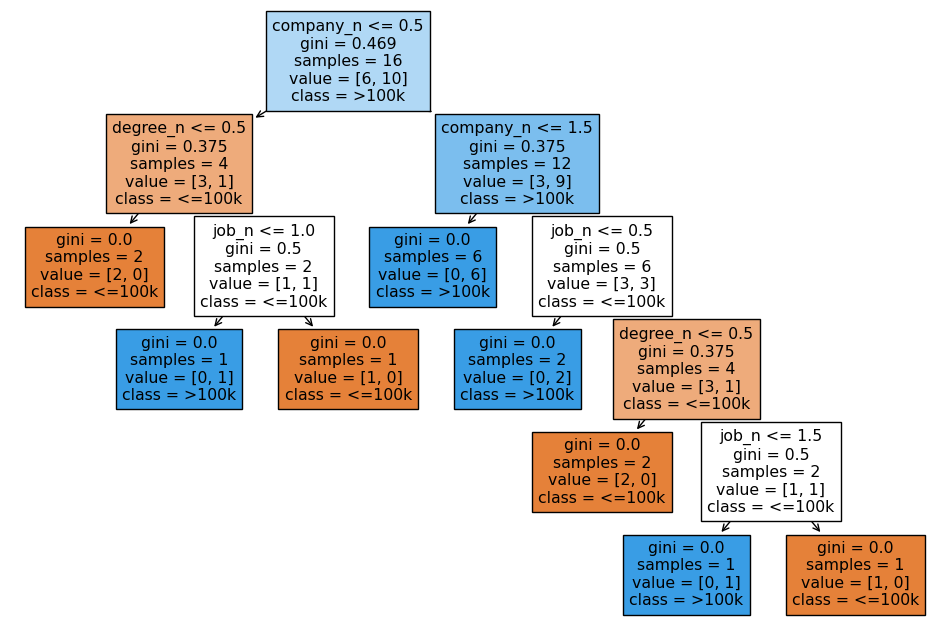

In [25]:
# Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=inputs_n.columns, class_names=['<=100k', '>100k'], filled=True)
plt.show()